In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('MOE_target_columns.csv')
scaled_df = pd.read_csv('scaled_MOE_target_columns.csv')
scaled_df.head()

,Accelerated Stability,volume,hyd_moment,pI_seq,ens_charge,patch_ion,patch_neg,modified_ens_charge,modified_pI_seq
0,0.196851,0.454754,0.269565,0.462793,0.500000,0.237288,0.000000,0.500000,6.837207
1,0.108084,0.270355,0.243257,0.093116,0.142857,0.525424,0.500000,0.142857,7.206884
2,0.180812,0.526838,0.346504,0.516514,0.500000,0.389831,0.105263,0.500000,6.783486
3,0.225032,0.667858,0.539379,0.823916,0.785714,0.305085,0.000000,0.785714,6.476084
4,0.111039,0.647423,0.778420,0.435933,0.428571,0.152542,0.236842,0.428571,6.864067


In [7]:
data_types = df.dtypes
print(data_types)

model                     object
name                      object
mseq                       int64
Query                    float64
Template                  object
comment                   object
Template ID               object
error                    float64
pH                       float64
patch_hyd                  int64
patch_pos                  int64
patch_neg                float64
patch_ion                float64
patch_cdr_hyd              int64
patch_cdr_pos              int64
patch_cdr_neg              int64
patch_cdr_ion              int64
res_hyd                   object
res_pos                   object
res_neg                   object
ens_charge               float64
mass                     float64
pI_3D                    float64
r_gyr                    float64
r_solv                   float64
asa_vdw                  float64
asa_hyd                  float64
asa_hph                  float64
volume                   float64
mobility                 float64
dipole_mom

In [8]:
columns_drop = ['Query', 'error', 'pH']
new_df = df.select_dtypes(include=['int', 'float'])
new_df.drop(columns=['Query', 'error', 'pH'], inplace=True)
new_df

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.1710,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.5390,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.9050,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.0420,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.5360,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,133,430,80,0.184211,0.271186,230,40,150,190,0.500000,25.653990,7.327637,17.717699,23.659315,10547.1310,5915.9258,4165.5684,0.458276,-0.424047,317.80878,0.566590,0.516514,0.145779,6.783486
132,134,420,90,0.473684,0.694915,320,50,70,120,0.714286,24.822853,8.045410,17.708420,22.982862,10222.8310,5787.6265,4038.5723,0.436453,3.162036,337.44629,0.508209,0.710505,0.203247,6.589495
133,135,470,230,0.263158,0.322034,220,100,180,280,0.500000,24.742920,8.821777,17.639877,22.961054,10174.7400,5781.9902,3982.5945,0.753815,6.360532,499.75851,0.223124,0.435933,0.178019,6.864067
134,136,570,90,0.000000,0.135593,330,40,100,140,0.571429,25.467899,7.488770,17.726509,23.342237,10389.3130,6108.8066,3889.8706,0.284922,0.141405,383.33072,0.093087,0.570235,0.099643,6.729765


Text(0.5, 1.0, 'Correlation Heatmap of Antibody Descriptors')

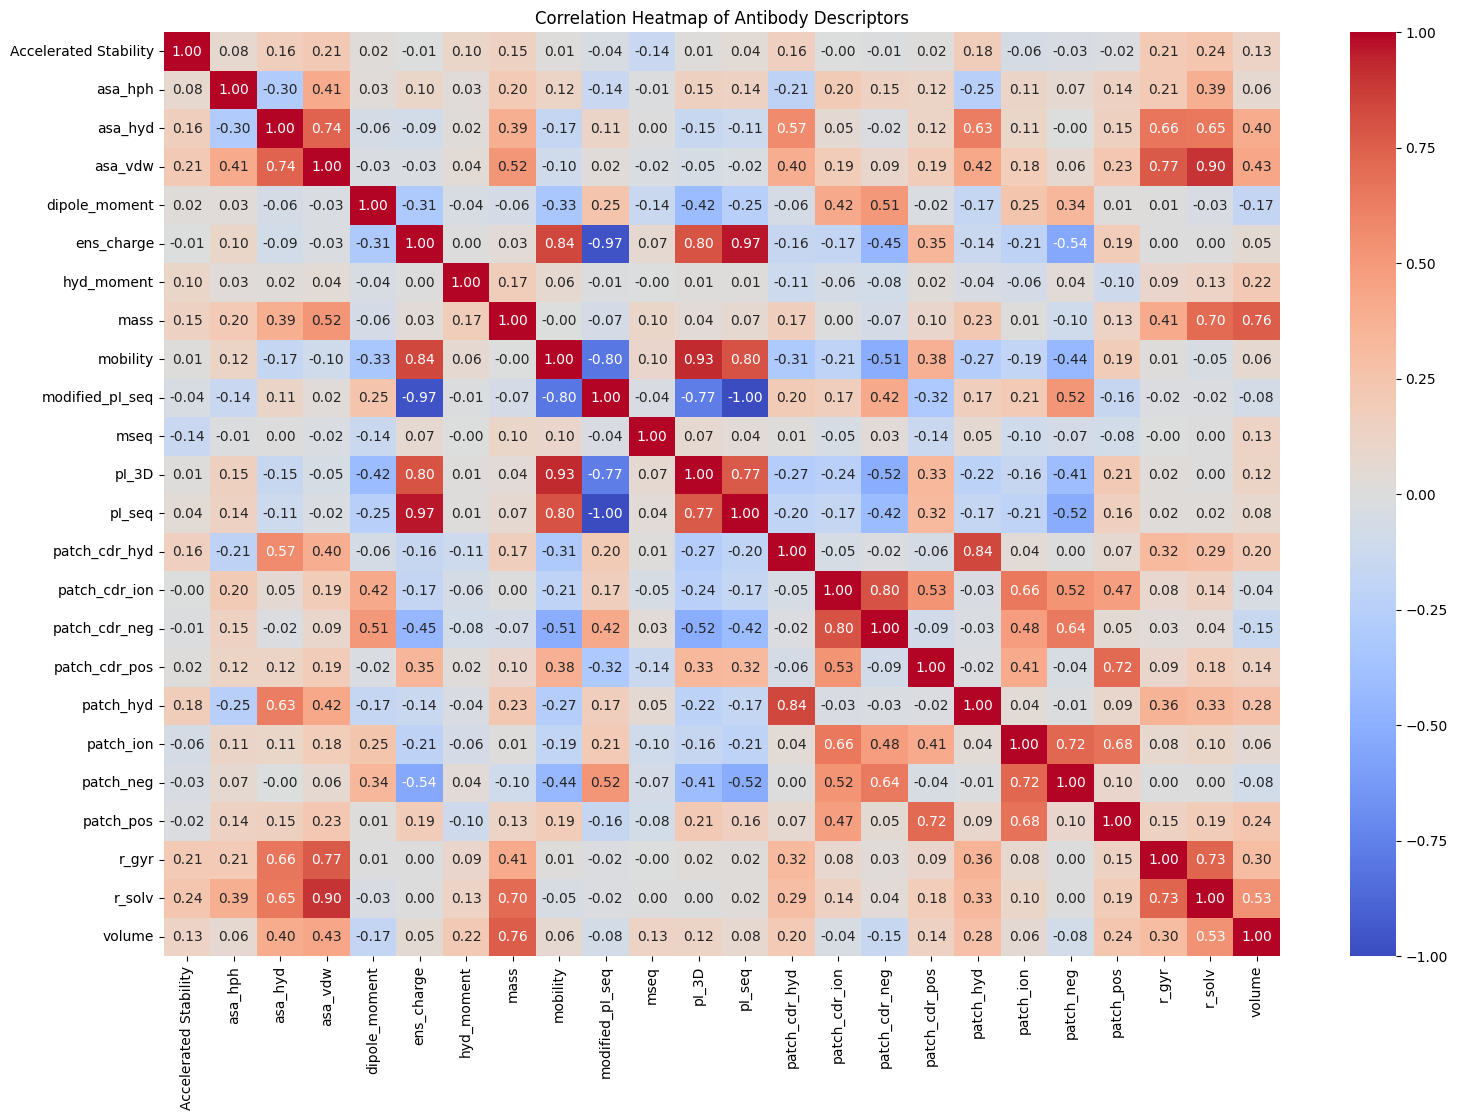

In [9]:
#heatmap of all integer variables
columns_drop = ['Query', 'error', 'pH']
heatmap_df = df.select_dtypes(include=['int', 'float']).columns.difference(columns_drop)
plt.figure(figsize=(18,12))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Antibody Descriptors')

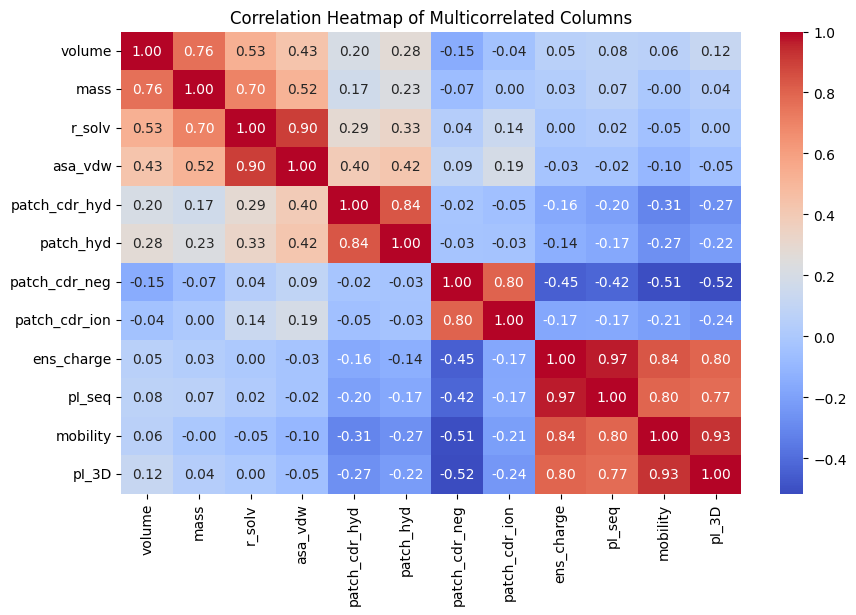

In [10]:
#colinear variables (half of these should be removed)
multico_var = ['volume', 'mass', 'r_solv', 'asa_vdw', 'patch_cdr_hyd', 'patch_hyd', 'patch_cdr_neg', 'patch_cdr_ion', 'ens_charge', 'pI_seq', 'mobility', 'pI_3D']
plt.figure(figsize=(10,6))
sns.heatmap(df[multico_var].corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Multicorrelated Columns')
plt.show()

In [16]:
heatmap_df = scaled_df.select_dtypes(include=['int', 'float']).columns
#print heatmap_df columns
print(heatmap_df)

plt.figure(figsize=(10,6))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Colinear Descriptors')

Index(['Accelerated Stability', 'volume', 'hyd_moment', 'pI_seq', 'ens_charge',
       'patch_ion', 'patch_neg', 'modified_ens_charge', 'modified_pI_seq'],
      dtype='object')


KeyError: "['ens_charge', 'modified_ens_charge'] not in index"

<Figure size 1000x600 with 0 Axes>

In [12]:
df.drop(columns=['ens_charge'], inplace=True)

In [13]:
# from pycaret.datasets import get_data
# from pycaret.regression import setup, compare_models

# setup(df, target='Accelerated Stability', remove_multicollinearity='vif', multicollinearity_threshold=10)

# best_model = compare_models()

In [14]:
new_df.head()

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.171,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.539,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.905,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.042,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.536,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

X = new_df.drop(columns=['Accelerated Stability']) # X has all features
y = new_df['Accelerated Stability'] # Y has all the targets

imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.reshape(-1,1)
y_train.reshape(-1,1)
X_test.reshape(-1,1)
y_test.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test.reshape(-1,1))

#Test predicts X_test and compares it to actual values of X_test
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = new_df.drop(columns=['Accelerated Stability'])
y = new_df['Accelerated Stability']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'Neural Network': MLPRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    results[name] = np.sqrt(-scores)
    
for name, scores in results.items():
    print(f'{name}: Mean RMSE: {np.mean(scores):.4f}, Standard Deviation RMSE: {np.std(scores):.4f}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 957, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
